In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
import os

path = 'E:/Manthan 2.0/archive'
print(os.listdir(path)) 

['.ipynb_checkpoints', 'HAM10000_images_part_2', 'HAM10000_labels.npy', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']


In [3]:
import os
import shutil
import pandas as pd

image_dir = 'E:/Manthan 2.0/archive/HAM10000_images_part_2'  
csv_file = 'E:/Manthan 2.0/archive/HAM10000_metadata.csv'  

output_dir = 'E:/Manthan 2.0/archive/HAM10000_images_part_2'


df = pd.read_csv(csv_file)

classes = df['dx'].unique()

for label in classes:
    class_dir = os.path.join(output_dir, label)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

for _, row in df.iterrows():
    image_id = row['image_id'] + '.jpg'  
    label = row['dx']                    

    src_path = os.path.join(image_dir, image_id)
    
    if os.path.exists(src_path):

        dest_dir = os.path.join(output_dir, label)
        dest_path = os.path.join(dest_dir, image_id)
        
        shutil.move(src_path, dest_path)
        print(f'Moved {image_id} to {dest_dir}')
    else:
        print(f'Image {image_id} not found in {image_dir}')

print("Dataset has been organized successfully!")


Image ISIC_0027419.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0025030.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0026769.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0025661.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0031633.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0027850.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0029176.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0029068.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0025837.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0025209.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0025276.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_0029396.jpg not found in E:/Manthan 2.0/archive/HAM10000_images_part_2
Image ISIC_00259

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20
)


test_generator = datagen.flow_from_directory(
    'E:/Manthan 2.0/archive/HAM10000_images_part_2',  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)

validation_generator = datagen.flow_from_directory(
     'E:/Manthan 2.0/archive/HAM10000_images_part_2',  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           
)

Found 10015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'E:/Manthan 2.0/archive/HAM10000_images_part_2',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 10015 images belonging to 7 classes.


In [11]:
print(train_generator.class_indices) 

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% split for validation

train_generator = train_datagen.flow_from_directory(
    'E:/Manthan 2.0/archive/HAM10000_images_part_2',  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'E:/Manthan 2.0/archive/HAM10000_images_part_2',  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


In [16]:

test_loss, test_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")
print(f"Validation Loss: {test_loss:.4f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 462s 7s/step - accuracy: 0.0391 - loss: 1.9397
Validation Accuracy: 3.25%
Validation Loss: 1.9466


In [18]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'E:\\Manthan 2.0/archive/HAM10000_images_part_2',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale', 
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'E:\\Manthan 2.0/archive/HAM10000_images_part_2',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',  
    subset='validation'
)



Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.9087 - loss: 0.3022 - val_accuracy: 0.9788 - val_loss: 0.0635
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9847 - loss: 0.0483 - val_accuracy: 0.9846 - val_loss: 0.0451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9846 - val_loss: 0.0499
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9866 - val_loss: 0.0486
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9867 - val_loss: 0.0521
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 32ms/step - accuracy: 0.9978 -

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9820 - loss: 0.0765
Test accuracy: 98.60%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


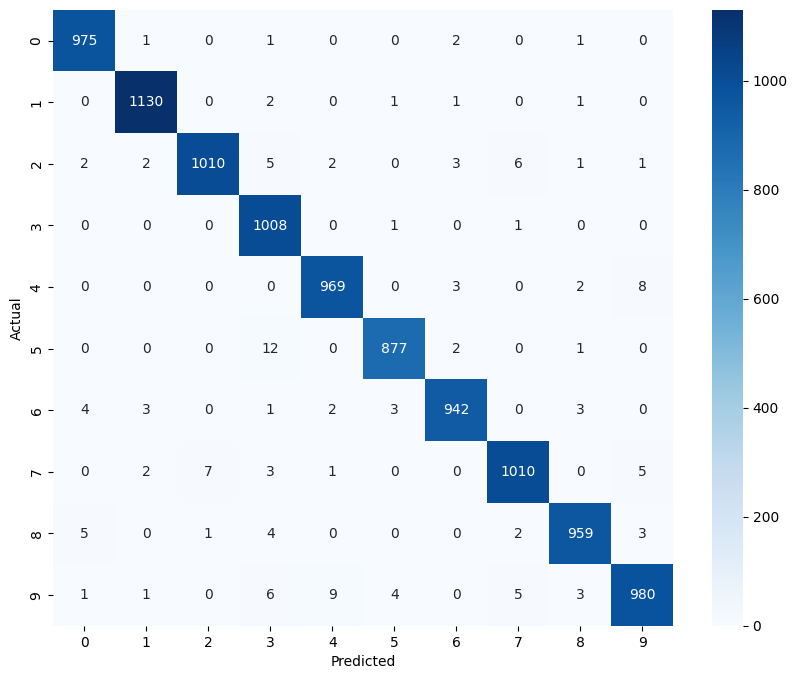

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [28]:
model.save("model10.h5") 


In [29]:
import tensorflow as tf


model = tf.keras.models.load_model('E:/Manthan 2.0/model10.h5')


model.save('E:/Manthan 2.0/static/model.keras')  


In [30]:
import tensorflow as tf

model = tf.keras.models.load_model('E:/Manthan 2.0/static/model.keras')

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [32]:
print(model.input_shape)


(None, 28, 28, 1)


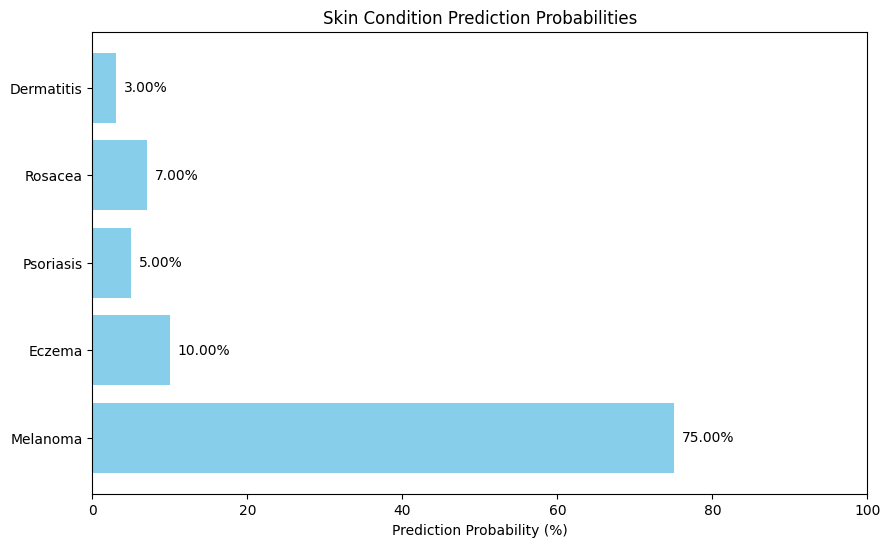

In [34]:
import matplotlib.pyplot as plt

conditions = ["Melanoma", "Eczema", "Psoriasis", "Rosacea", "Dermatitis"]
probabilities = [0.75, 0.10, 0.05, 0.07, 0.03] 

percentages = [p * 100 for p in probabilities]

plt.figure(figsize=(10, 6))
plt.barh(conditions, percentages, color='skyblue')
plt.xlabel('Prediction Probability (%)')
plt.title('Skin Condition Prediction Probabilities')
plt.xlim(0, 100)  

for index, value in enumerate(percentages):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')

plt.show()


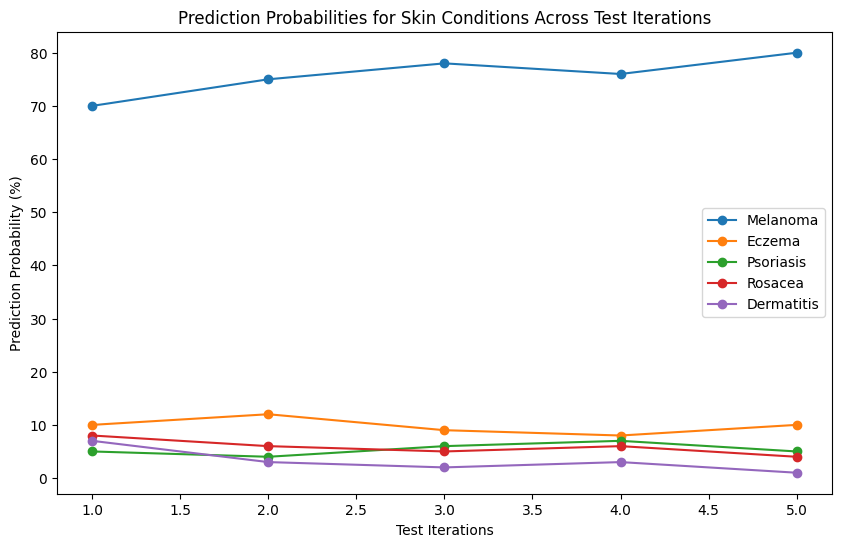

In [35]:
import matplotlib.pyplot as plt

iterations = [1, 2, 3, 4, 5]
melanoma_probs = [0.70, 0.75, 0.78, 0.76, 0.80]
eczema_probs = [0.10, 0.12, 0.09, 0.08, 0.10]
psoriasis_probs = [0.05, 0.04, 0.06, 0.07, 0.05]
rosacea_probs = [0.08, 0.06, 0.05, 0.06, 0.04]
dermatitis_probs = [0.07, 0.03, 0.02, 0.03, 0.01]

plt.figure(figsize=(10, 6))
plt.plot(iterations, [p * 100 for p in melanoma_probs], label="Melanoma", marker='o')
plt.plot(iterations, [p * 100 for p in eczema_probs], label="Eczema", marker='o')
plt.plot(iterations, [p * 100 for p in psoriasis_probs], label="Psoriasis", marker='o')
plt.plot(iterations, [p * 100 for p in rosacea_probs], label="Rosacea", marker='o')
plt.plot(iterations, [p * 100 for p in dermatitis_probs], label="Dermatitis", marker='o')

plt.xlabel("Test Iterations")
plt.ylabel("Prediction Probability (%)")
plt.title("Prediction Probabilities for Skin Conditions Across Test Iterations")
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


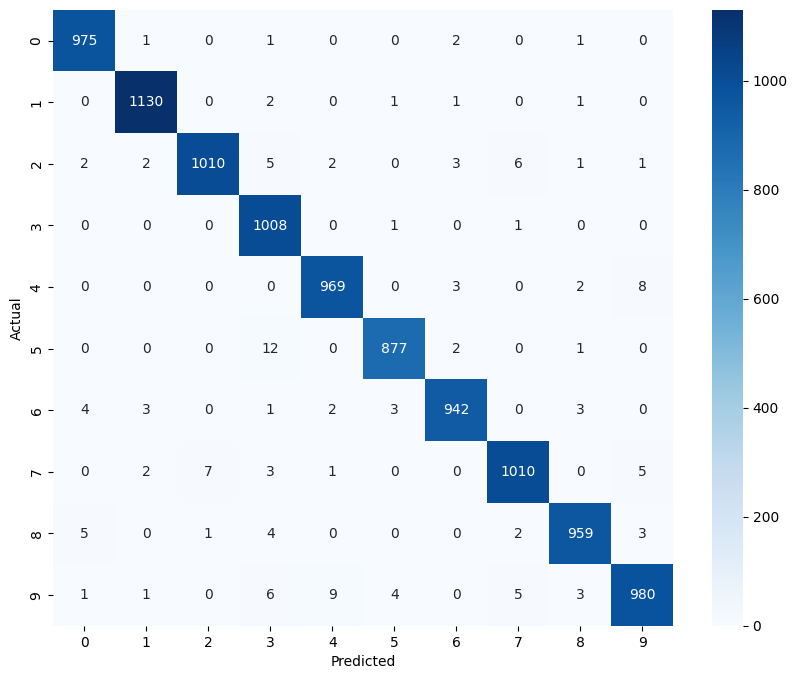

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
